curses is not supported on this machine (please install/reinstall curses for an optimal experience)
INFO:tensorflow:Restoring parameters from C:\ADOA FINAL\redbloodcell-0.001-Adoa-model-1.model
ADOA model loaded sucessfully!


100%|████████████████████████████████████████████| 6/6 [00:01<00:00,  5.21it/s]


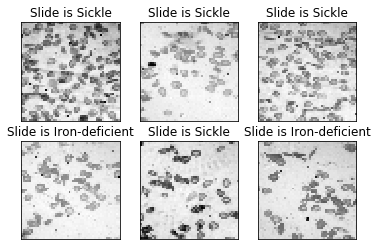

In [1]:
#imports
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

TEST_DIR ='C:/ADOA FINAL/Testingset/ground truth test'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'redbloodcell-{}-{}.model'.format(LR, 'Adoa-model-1')

#initializing the classifier
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet)

if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('ADOA model loaded sucessfully!')
    
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    np.save('test_data.npy',testing_data)
    return testing_data

#if you dont have this file yet
test_data = process_test_data()
#if you already have it
#test_data = np.load('test_data.npy')

#for plots output
fig = plt.figure()

for num, data in enumerate(test_data[:6]):
    # sickle: [1,0]
    # normal: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(2,3,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Slide is Sickle'
    else: str_label = 'Slide is Iron-deficient'
        
    y.imshow(orig, cmap='gray', aspect=1.0,)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()